In [8]:
import numpy as np
import matplotlib.pyplot as plt
import time as time
import SVM_functions as svmf
from cvxopt import matrix, solvers
from scipy.stats import norm

In [3]:
with open('synth_data/synth_0.1.csv', 'r') as f:
    data = np.loadtxt(f, delimiter=',')

np.random.shuffle(data)
X_train = data[:5, :-1]
t_train = data[:5, -1].reshape(-1, 1)
X_test = data[5: , :-1]
t_test = data[5: , -1].reshape(-1, 1)

In [4]:
X_train.shape, X_test.shape, t_train.shape, t_test.shape

((5, 2), (75, 2), (5, 1), (75, 1))

In order to gain some perspective on how this works and why it is not working for the data I am giving it, I'll start by attempting to solve a simpler problem with linear data:

In [14]:
sigma = 0.2

ys_pos = np.random.uniform(0, 10, 15)
xs_pos = ys_pos + np.ones(ys_pos.shape) + norm.rvs(0, sigma, size=ys_pos.shape)

ys_neg = np.random.uniform(0, 10, 15)
xs_neg = ys_neg - np.ones(ys_neg.shape) + norm.rvs(0, sigma, size=ys_neg.shape)

pos = np.hstack((ys_pos.reshape(-1, 1), xs_pos.reshape(-1, 1)))
neg = np.hstack((ys_neg.reshape(-1, 1), xs_neg.reshape(-1, 1)))
t = np.append(np.ones(pos.shape[0]), -1 * np.ones(pos.shape[0])).reshape(-1, 1)
X = np.vstack((pos, neg))

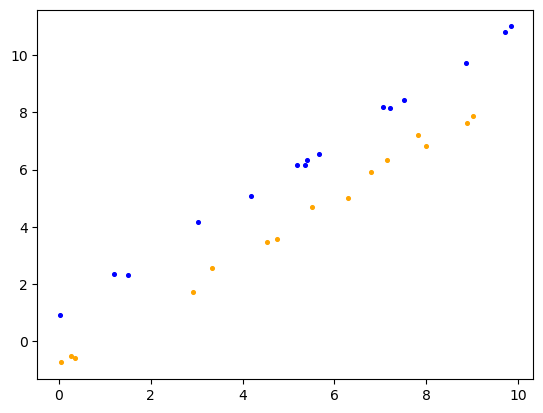

In [15]:
plt.scatter(ys_pos, xs_pos, color='blue', s=7)
plt.scatter(ys_neg, xs_neg, color='orange', s=7)
plt.show()

In [18]:
X_train = X[:25]
X_test = X[25:]
t_train = t[:25]
t_test = t[25:]

In [1]:
N = X_train.shape[0]
K = 3
B = 2
R = 1


H = np.array([[np.dot(X_train[n], X_train[m]) - R for n in range(N)] for m in range(N)])
H = H * t_train
H = H * t_train.reshape(1, -1)
#Making precision matrix
b = np.array([B**k for k in range(K)])
P = np.zeros((N, K * N))
for i in range(N):
    P[i, i*K: (i + 1) * K] = b

#We have our QUBOS
q = -P.T @ np.ones((N, 1))
Q = (P.T @ H) @ P
#Restricting it to between 0 and 1
G = np.vstack((np.diag(-1 * np.ones(N * K)), np.diag(np.ones(N * K))))
h = np.vstack((np.zeros((N * K, 1)), np.ones((N * K, 1))))

print(Q.shape, q.shape, G.shape, h.shape)

NameError: name 'X_train' is not defined

In [84]:
P = matrix(Q, tc='d')
p = matrix(q, tc='d')
A = matrix(G, tc='d')
b = matrix(h, tc='d')

In [88]:
#solvers.qp(P, p, A, b)

In [87]:
def f(x, Q, q):
    return 0.5 * (x.T @ Q) @ x + q.T @ x

## Annealing
Scipy.optimise has annealing functions but they do not suit binary optimisation, which becomes a non-convex function.<br>
Our problem is: <br>
$min_x \frac{1}{2} a^T Q a + q^T a$ <br>
Where a is the binarised form of alpha, which is N length, so a is binary length NK.